# Basque Country Weather Evolution

In this kernel I am going to explore the weather evolution in the last century in the region of the Basque Country.

# Table of contents

<nav>
  <ul>
    <li><a href="#introduction">Introduction</a></li>
    <ul>
      <li><a href="#hypothesis">Hypothesis</a></li>
    </ul>    
    <li><a href="#libraries">Import libraries and data</a></li>
    <ul>
      <li><a href="#dataset-variables">Dataset Parameters</a></li>
    </ul>  
    <li><a href="#clean-variables">Clean Dataset and select representative variables</a></li>
    <li><a href="#BC-EDA">Basque Country EDA</a></li>
    <ul>
      <li><a href="#main-info">Main data and type</a></li>
      <li><a href="#categorical-variables">Categorical variables</a></li>
      <li><a href="#numerical-variables">Numerical Variables</a></li>
      <li><a href="#temporal-analysis">Temporal analysis</a></li>
      <ul>
        <li><a href="#temperature-tendency">Temperature Tendency</a></li>
        <li><a href="#precipitation-patterns">Precipitatacion Patterns</a></li>
      </ul>
      <li><a href="#geographical-comparison">Geografical Comparison</a></li>
    </ul>
  </ul>
</nav>


<h1 id="introduction">Introduction</h1>

Through this EDA (Exploratory Data Analysis) I will study the impact of climate change in the Basque Country region.
The weather data has been obtained throuhg AEMET API.

<h2 id="hypothesis">Hypothesis</h2>

- Regions experiencing greater increases in temperature also show greater levels of drought.
- Precipitation has decreased in recent decades, increasing drought conditions.
- Water management has had to adapt significantly in response to changing climate conditions.
- Global warming causes an increase in the average temperature of the territory but also in adverse phenomena such as extreme cold and precipitation.

<h1 id="libraries">Import libraries and data</h1>


In [1]:
import os
import re
import sys
import time

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns

from matplotlib.patches import Rectangle

from utils import datascience as ds
from utils import functions as f
from utils import vizdatatools as viz


In [2]:
# Import data from basque country (euskadi)
df_weather_original = pd.read_csv('./data/processed/BC_month_year_climate.csv')

# AWS info (Spain)
df_ema_original = pd.read_csv('./data/processed/EMA_info.csv')

In [3]:
# Delete displayed columns-limit
pd.set_option('display.max_columns', None)

df_weather_original.head(5)

,fecha,idema,p_max,hr,nw_55,tm_min,ta_max,ts_min,nt_30,w_racha,np_100,nw_91,np_001,ta_min,w_rec,e,np_300,p_mes,w_med,nt_00,ti_max,tm_mes,tm_max,np_010,n_cub,n_des,n_nub,evap,n_fog,n_tor,n_gra,n_llu,n_nie,nv_0050,nv_1000,nv_0100,q_max,q_mar,q_med,q_min,inso,p_sol,ts_20,ts_10,ts_50,glo,latitud,provincia,altitud,nombre,indsinop,longitud
0,2009-10,1012P,35.2(22),74.0,1.0,12.7,30.8(06),22.9,1.0,16/15.3(20),3.0,0.0,12.0,1.9(16),99.0,142.0,1.0,117.4,4.0,0.0,11.4,16.8,20.9,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.326389,GIPUZKOA,120,IRUN,NaN,-1.796667
1,2009-11,1012P,NaN,67.0,14.0,10.6,26.9(01),17.2,0.0,25/27.2(07),NaN,1.0,NaN,5.3(30),254.0,107.0,NaN,NaN,10.0,0.0,10.3,14.1,17.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.326389,GIPUZKOA,120,IRUN,NaN,-1.796667
2,2009-12,1012P,NaN,73.0,10.0,6.6,19.6(29),16.0,0.0,14/26.1(21),NaN,1.0,NaN,-1.3(19),189.0,88.0,NaN,NaN,7.0,3.0,2.4,9.4,12.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.326389,GIPUZKOA,120,IRUN,NaN,-1.796667
3,2009-1,1012P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.326389,GIPUZKOA,120,IRUN,NaN,-1.796667
4,2009-2,1012P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.326389,GIPUZKOA,120,IRUN,NaN,-1.796667


<h2 id="dataset-variables">Dataset Parameters</h2>

The following list shows all the variables the dataset contains. 

The highlighted ones are the primary parameters to this EDA in a first instance.

- `fecha: year and month, string (YYYY-MM)`
- `idema: AWS (Automatic Weather Stations) id, string`
- `nombre: name (location) of the station, string`
- `provincia: province of the station, string`
- `altitud: station altitude in meters above sea level, m`
- `longitud: longitude, degrees`
- `latitud : latitude, degress`

- `tm_mes: Monthly average temperature, °C`
- tm_max: Monthly average of maximum temperatures, °C
- tm_min: Monthly average of minimum temperatures, °C
- `ta_max: Absolute maximum temperature of the month and date, °C (day)` --> `I will detele day information`
- `ta_min: Absolute minimum temperature of the month and date, °C (day)` --> `I will detele day information`
- ts_min: Highest minimum temperature of the month, °C
- ti_max: Lowest maximum temperature of the month, °C
- `nt_30: Number of days with maximum temperature greater than or equal to 30 °C, number of days`
- `nt_00: Number of days with minimum temperature less than or equal to 0 °C, number of days`

- `p_mes: Total monthly precipitation, mm`
- p_max: Maximum daily precipitation of the month and date, mm (day)
- `np_001: Number of days with appreciable precipitation (>= 0.1 mm) in the month, number of days`
- np_010: Number of days with precipitation greater than or equal to 1 mm in the month, number of days
- np_100: Number of days with precipitation greater than or equal to 10 mm in the month, number of days
- np_300: Number of days with precipitation greater than or equal to 30 mm in the month, number of days

- hr: Monthly average relative humidity, %
- e: Monthly average vapor pressure, tenths of hPa
- `n_llu: Number of rainy days in the month, number of days`
- `n_nie: Number of snowy days in the month, number of days`
- `n_gra: Number of hail days in the month, number of days`
- n_tor: Number of stormy days in the month, number of days
- n_fog: Number of foggy days in the month, number of days
- n_des: Number of clear days in the month, number of days
- n_nub: Number of cloudy days in the month, number of days
- n_cub: Number of overcast days in the month, number of days
- inso: Monthly average daily sunshine, hours
- p_sol: Monthly average percentage of daily sunshine relative to theoretical sunshine, %
- `glo: Monthly global radiation, tens of kJ/m2`
- evap: Total monthly evaporation, tenths of mm

- w_rec: Monthly average daily wind travel (from 07 to 07 UTC), km
- w_racha: Direction, speed, and date of the maximum gust in the month, direction in tens of degrees (99 = variable direction)(88 = no direction data), speed in m/s
- nw_55: Number of days with wind speed greater than or equal to 55 km/h in the month, number of days
- `nw_91: Number of days with wind speed greater than or equal to 91 km/h in the month, number of days`
- w_med: Monthly average wind speed based on observations at 07, 13, and 18 UTC, km/h

- q_med: Monthly average pressure at station level, hPa
- q_max: Absolute maximum monthly pressure and date, hPa
- q_min: Absolute minimum monthly pressure and date, hPa
- q_mar: Monthly average pressure at sea level, hPa

- `ts_10: Monthly average temperature at 10 cm depth, °C`
- `ts_20: Monthly average temperature at 20 cm depth, °C`
- `ts_50: Monthly average temperature at 50 cm depth, °C`

- nv_0050: Number of days with visibility less than 50 m in the month, number of days
- nv_0100: Number of days with visibility greater than or equal to 50 m and less than 100 m in the month, number of days
- nv_1000: Number of days with visibility greater than or equal to 100 m and less than 1 km in the month, number of days

In [4]:
# Exploring data, missing values and type
df_weather_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11448 entries, 0 to 11447
Data columns (total 52 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   fecha      11448 non-null  object 
 1   idema      11448 non-null  object 
 2   p_max      10419 non-null  object 
 3   hr         9111 non-null   float64
 4   nw_55      7747 non-null   float64
 5   tm_min     10148 non-null  float64
 6   ta_max     10143 non-null  object 
 7   ts_min     10115 non-null  float64
 8   nt_30      10143 non-null  float64
 9   w_racha    7772 non-null   object 
 10  np_100     10410 non-null  float64
 11  nw_91      7747 non-null   float64
 12  np_001     10410 non-null  float64
 13  ta_min     10148 non-null  object 
 14  w_rec      7463 non-null   float64
 15  e          9176 non-null   float64
 16  np_300     10410 non-null  float64
 17  p_mes      10423 non-null  float64
 18  w_med      8550 non-null   float64
 19  nt_00      10148 non-null  float64
 20  ti_max

In [5]:
print(df_weather_original.shape)
print(df_weather_original.nunique())

(11448, 52)
fecha        1164
idema          37
p_max        7370
hr             48
nw_55          29
tm_min        233
ta_max       5419
ts_min        225
nt_30          22
w_racha      6907
np_100         20
nw_91          15
np_001         31
ta_min       4844
w_rec         585
e             185
np_300         10
p_mes        2739
w_med          33
nt_00          28
ti_max        281
tm_mes        234
tm_max        271
np_010         29
n_cub          29
n_des          17
n_nub          27
evap         1274
n_fog          22
n_tor          13
n_gra          10
n_llu          29
n_nie          15
nv_0050        12
nv_1000        14
nv_0100         4
q_max        3970
q_mar         258
q_med         706
q_min        4172
inso           94
p_sol          63
ts_20         200
ts_10         201
ts_50         183
glo          1241
latitud        36
provincia       3
altitud        34
nombre         37
indsinop       10
longitud       36
dtype: int64


In [6]:
df_weather_original.describe()

,hr,nw_55,tm_min,ts_min,nt_30,np_100,nw_91,np_001,w_rec,e,np_300,p_mes,w_med,nt_00,ti_max,tm_mes,tm_max,np_010,n_cub,n_des,n_nub,evap,n_fog,n_tor,n_gra,n_llu,n_nie,nv_0050,nv_1000,nv_0100,q_mar,q_med,inso,p_sol,ts_20,ts_10,ts_50,glo,latitud,altitud,indsinop,longitud
count,9111.000000,7747.000000,10148.000000,10115.000000,10143.000000,10410.000000,7747.00000,10410.000000,7463.000000,9176.000000,10410.000000,10423.000000,8550.000000,10148.000000,10110.000000,10137.000000,10143.000000,10410.000000,4968.000000,4968.000000,4968.000000,3576.000000,4309.000000,4305.000000,4307.000000,4307.000000,4307.000000,3829.000000,3829.000000,3829.000000,4799.000000,4876.000000,3836.000000,3836.000000,686.000000,691.000000,688.000000,1254.000000,11448.000000,11448.000000,5856.000000,11448.000000
mean,75.989793,4.827675,9.021817,14.834048,1.356009,3.384438,0.49361,14.534774,222.453571,124.641129,0.578386,103.898072,9.998363,1.635692,11.019693,13.531193,17.997456,10.629683,13.283011,2.984903,14.127013,848.837248,3.707125,1.737282,0.450662,14.733689,0.485953,0.425437,1.487072,0.033429,1018.320859,993.256809,4.831830,38.642857,13.865015,14.519247,13.790552,37462.404306,43.139450,275.236897,8037.846311,-2.484228
std,6.773504,4.936427,4.551799,4.089205,2.784430,3.031640,1.32750,5.086512,116.258365,38.472750,1.044340,82.224069,4.798209,3.611684,5.713597,4.910950,5.549755,4.756027,4.461275,2.641139,3.980748,368.982414,3.553295,1.874790,0.976056,4.797273,1.421576,1.153791,1.935116,0.204266,4.108479,23.088747,1.848054,11.048816,5.741484,5.962663,5.276148,17627.919790,0.225887,228.964594,19.526949,0.407820
min,50.000000,0.000000,-6.200000,1.400000,0.000000,0.000000,0.00000,0.000000,11.000000,49.000000,0.000000,0.000000,0.000000,0.000000,-8.200000,-2.800000,0.700000,0.000000,1.000000,0.000000,2.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1001.300000,946.600000,0.700000,7.000000,2.200000,4.000000,4.300000,8869.000000,42.567222,4.000000,8024.000000,-3.231667
25%,72.000000,1.000000,5.500000,11.800000,0.000000,1.000000,0.00000,11.000000,133.000000,92.000000,0.000000,45.500000,6.000000,0.000000,6.600000,9.600000,13.600000,7.000000,10.000000,1.000000,11.000000,585.750000,1.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,1016.100000,968.800000,3.300000,30.000000,8.700000,9.200000,8.800000,18984.500000,43.025000,90.000000,8026.000000,-2.752778
50%,76.000000,3.000000,8.800000,15.000000,0.000000,3.000000,0.00000,14.000000,200.000000,116.000000,0.000000,81.800000,9.000000,0.000000,10.900000,13.400000,17.900000,10.000000,13.000000,2.000000,14.000000,803.000000,3.000000,1.000000,0.000000,15.000000,0.000000,0.000000,1.000000,0.000000,1018.100000,994.500000,4.800000,39.000000,13.350000,14.200000,13.250000,39418.500000,43.203333,250.000000,8029.000000,-2.510278
75%,81.000000,7.000000,12.800000,18.100000,1.000000,5.000000,0.00000,18.000000,281.000000,156.000000,1.000000,138.900000,13.000000,1.000000,15.800000,17.900000,22.700000,14.000000,16.000000,4.000000,17.000000,1042.000000,6.000000,3.000000,1.000000,18.000000,0.000000,0.000000,2.000000,0.000000,1020.400000,1014.400000,6.200000,47.000000,19.375000,20.000000,19.000000,53246.500000,43.306389,513.000000,8036.000000,-2.184167
max,97.000000,28.000000,20.500000,26.600000,21.000000,19.000000,14.00000,30.000000,769.000000,270.000000,9.000000,626.900000,32.000000,29.000000,25.100000,24.900000,31.400000,28.000000,29.000000,16.000000,28.000000,3087.000000,21.000000,12.000000,11.000000,28.000000,17.000000,11.000000,13.000000,3.000000,1035.400000,1031.900000,10.600000,72.000000,25.400000,26.900000,23.800000,77732.000000,43.453889,910.000000,8080.000000,-1.792222


Many values are missing in this dataset but it was expected due to the following factors:
- Each AWS (Automatic Weather Stations) has been built in different year.
- Each AWS must not have all metereological sensors available, or may be broken at some period

<h2 id="clean-variables">Clean dataset and select representative variables</h2>

For this EDA I have chosen some representative weather parameters to start with. If needed, I will consider the use of other parameters later.

- Cambiar a dataset
- Mostras categoricas (estaciones), frente a variables numéricas para ver qué pueblos tienen más información y quedarme solo con esas
- De las numéricas ver las tendencias por pueblo

In [7]:
# Weather Parameters chosen to the EDA
parameters = ['idema', 'fecha', 'nombre', 'provincia', 
              'tm_mes', 'ta_max', 'ta_min', 'nt_30', 'nt_00', 
              'p_mes', 'np_001', 'n_llu', 'n_nie', 'n_gra',
              'glo', 'nw_91', 'ts_10', 'ts_20', 'ts_50',
              'altitud', 'longitud', 'latitud']

# DO NOT modify the original DataFrame
df_weather = df_weather_original.loc[:, parameters].copy()

# "fecha" to datetime
df_weather['fecha'] = pd.to_datetime(df_weather['fecha'], format='%Y-%m')

# String correction
df_weather['provincia'] = df_weather['provincia'].replace('ARABA/ALAVA', 'ARABA')

# String to title style
df_weather['provincia'] = df_weather['provincia'].str.title()
df_weather['nombre'] = df_weather['nombre'].str.title()

# Not interested in day information
df_weather['ta_max'] = df_weather['ta_max'].str.replace(r'\(.*\)', '', regex = True).astype(float)
df_weather['ta_min'] = df_weather['ta_min'].str.replace(r'\(.*\)', '', regex = True).astype(float)

# EDA from the oldest data to 2024-june
df_weather = df_weather[df_weather['fecha'] <= '2024-06']
print('Oldest date: ', df_weather['fecha'].min())
print('Last date: ', df_weather['fecha'].max())

# Sort by idema and date
df_weather.sort_values(by = ['idema', 'fecha'], inplace = True)

# Display
display(df_weather.head(5))

Oldest date:  1928-01-01 00:00:00
Last date:  2024-06-01 00:00:00


,idema,fecha,nombre,provincia,tm_mes,ta_max,ta_min,nt_30,nt_00,p_mes,np_001,n_llu,n_nie,n_gra,glo,nw_91,ts_10,ts_20,ts_50,altitud,longitud,latitud
3,1012P,2009-01-01,Irun,Gipuzkoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120,-1.796667,43.326389
4,1012P,2009-02-01,Irun,Gipuzkoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120,-1.796667,43.326389
5,1012P,2009-03-01,Irun,Gipuzkoa,10.9,24.5,3.2,0.0,0.0,97.8,13.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,120,-1.796667,43.326389
6,1012P,2009-04-01,Irun,Gipuzkoa,12.2,24.6,6.2,0.0,0.0,251.6,18.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,120,-1.796667,43.326389
7,1012P,2009-05-01,Irun,Gipuzkoa,15.6,26.2,8.9,0.0,0.0,135.8,17.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,120,-1.796667,43.326389


`Up to this section all the code could be generalized to have a dataset for any province/s.`

But next steps will be an analysis focused over the tree basque country provinces: Bizkaia, Gipuzkoa, and Araba.

<h1 id="BC-EDA">Basque Country EDA</h1>

<h2 id="main-info">Get data main information and type</h2>

In [8]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11238 entries, 3 to 11447
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   idema      11238 non-null  object        
 1   fecha      11238 non-null  datetime64[ns]
 2   nombre     11238 non-null  object        
 3   provincia  11238 non-null  object        
 4   tm_mes     10137 non-null  float64       
 5   ta_max     10143 non-null  float64       
 6   ta_min     10148 non-null  float64       
 7   nt_30      10143 non-null  float64       
 8   nt_00      10148 non-null  float64       
 9   p_mes      10423 non-null  float64       
 10  np_001     10410 non-null  float64       
 11  n_llu      4307 non-null   float64       
 12  n_nie      4307 non-null   float64       
 13  n_gra      4307 non-null   float64       
 14  glo        1254 non-null   float64       
 15  nw_91      7747 non-null   float64       
 16  ts_10      691 non-null    float64       
 17

In [9]:
ds.get_cardinality(df_weather)

pandas.DataFrame shape:  (11238, 22)


,Card,%_Card,NaN_Values,Type
idema,37,0.32924,0,object
fecha,1158,10.304325,0,datetime64[ns]
nombre,37,0.32924,0,object
provincia,3,0.026695,0,object
tm_mes,234,2.082221,1101,float64
ta_max,324,2.883075,1095,float64
ta_min,294,2.616124,1090,float64
nt_30,22,0.195764,1095,float64
nt_00,28,0.249155,1090,float64
p_mes,2739,24.372664,815,float64


In [10]:
df_weather.describe()

,fecha,tm_mes,ta_max,ta_min,nt_30,nt_00,p_mes,np_001,n_llu,n_nie,n_gra,glo,nw_91,ts_10,ts_20,ts_50,altitud,longitud,latitud
count,11238,10137.000000,10143.000000,10148.000000,10143.000000,10148.000000,10423.000000,10410.000000,4307.000000,4307.000000,4307.000000,1254.000000,7747.00000,691.000000,686.000000,688.000000,11238.000000,11238.000000,11238.000000
mean,2003-02-05 19:52:49.460758272,13.531193,26.336045,3.490116,1.356009,1.635692,103.898072,14.534774,14.733689,0.485953,0.450662,37462.404306,0.49361,14.519247,13.865015,13.790552,274.683396,-2.483467,43.139961
min,1928-01-01 00:00:00,-2.800000,6.000000,-21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8869.000000,0.00000,4.000000,2.200000,4.300000,4.000000,-3.231667,42.567222
25%,1998-01-01 00:00:00,9.600000,21.000000,-0.600000,0.000000,0.000000,45.500000,11.000000,11.000000,0.000000,0.000000,18984.500000,0.00000,9.200000,8.700000,8.800000,45.000000,-2.752778,43.025000
50%,2011-02-01 00:00:00,13.400000,26.200000,3.000000,0.000000,0.000000,81.800000,14.000000,15.000000,0.000000,0.000000,39418.500000,0.00000,14.200000,13.350000,13.250000,250.000000,-2.510278,43.203333
75%,2017-11-01 00:00:00,17.900000,31.600000,7.800000,1.000000,1.000000,138.900000,18.000000,18.000000,0.000000,1.000000,53246.500000,0.00000,20.000000,19.375000,19.000000,513.000000,-2.184167,43.306389
max,2024-06-01 00:00:00,24.900000,44.000000,17.000000,21.000000,29.000000,626.900000,30.000000,28.000000,17.000000,11.000000,77732.000000,14.00000,26.900000,25.400000,23.800000,910.000000,-1.792222,43.453889
std,NaN,4.910950,6.713211,5.384646,2.784430,3.611684,82.224069,5.086512,4.797273,1.421576,0.976056,17627.919790,1.32750,5.962663,5.741484,5.276148,228.878246,0.407937,0.226004


<h2 id = "categorical-variables">Categorical variables</h2>

I want to check which AWSs have more data in the dataset.

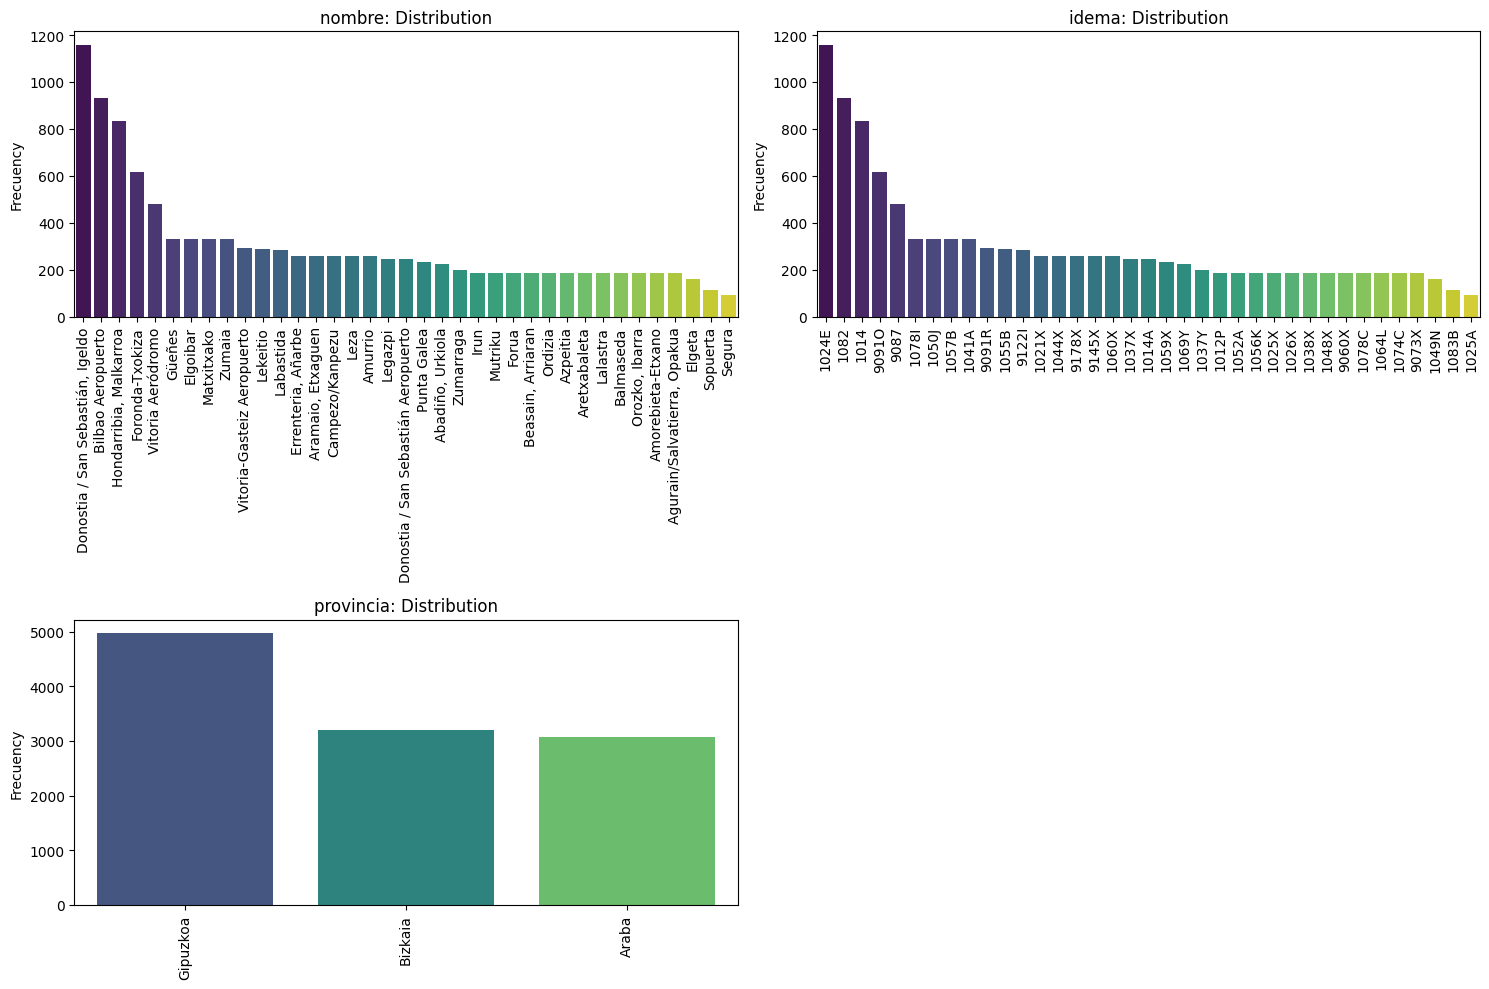

In [11]:
# "idema" would be the main categorical variable. "provincia" and "nombre" are correlated with "idema"
categorical_columns = ['nombre', 'idema', 'provincia']

viz.plot_multiple_categorical_distributions(df_weather, categorical_columns, show_values = False, rotation = 90)

As expected, we can see the three capitals of Basque Country provinces (Bilbao, Donostia and Vitoria-Gasteiz) in the top 5 of cities with weather data information, or at least close the main cities.

1. Donostia, Igeldo, the closest mountain to the city
2. Bilbao airport, located in Loiu, aproximately 10 km to Bilbao city center.
3. Hondarribia-Malkarroa, aproximately 20 km to Donostia city center.
4. Foronda-Txokiza, close to Vitoria-Gasteiz airport, less than 10 km to the city center.
5. Vitoria Airfield, less than 10 km to the Vitoria-Gasteiz city center.


<h2 id = "numerical-variables">Numerical Variables</h2>

First I am going to analyze all the data together (knowing there are a lot of missing values) but just for get the distribution of the parameters and look for outliers.

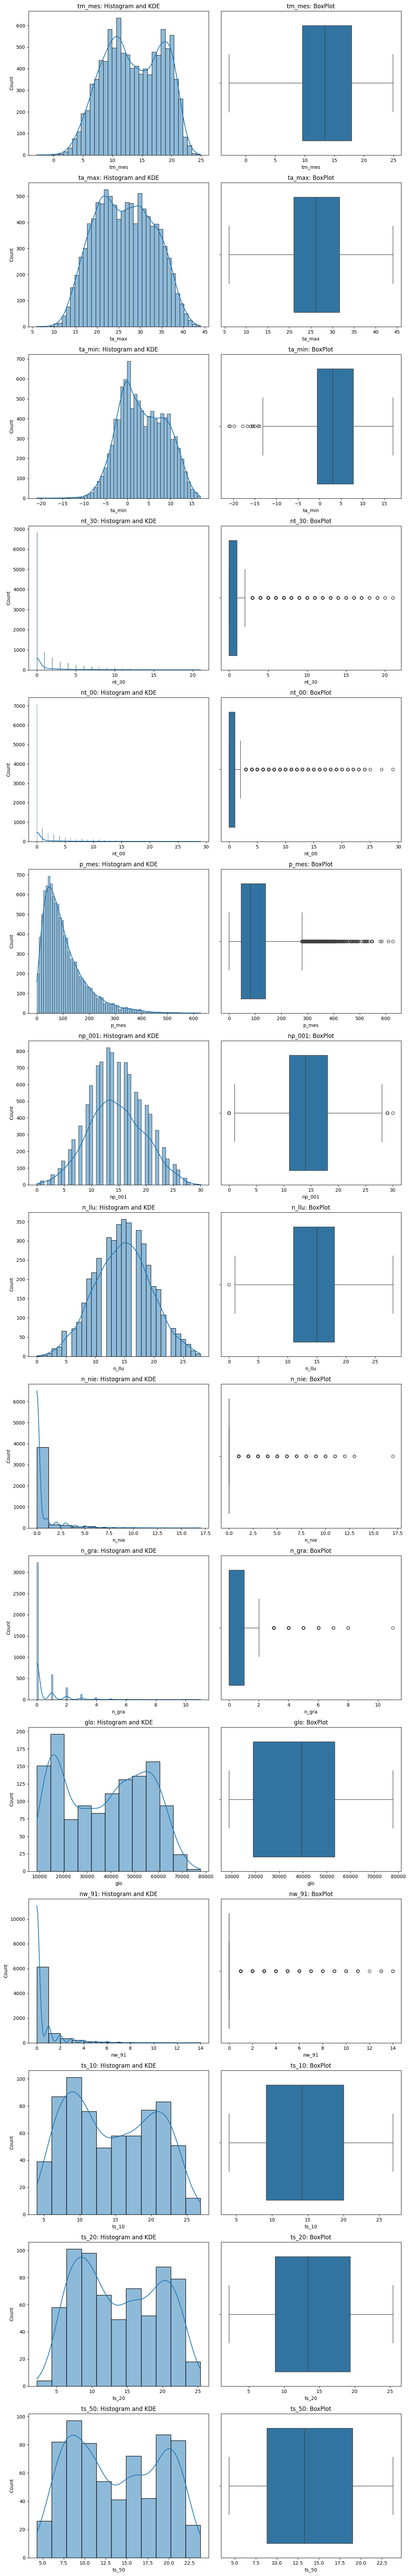

In [12]:
numeric_columns = ['tm_mes', 'ta_max', 'ta_min', 'nt_30', 'nt_00', 
                  'p_mes', 'np_001', 'n_llu', 'n_nie', 'n_gra',
                  'glo', 'nw_91', 'ts_10', 'ts_20', 'ts_50']

viz.plot_multiple_histograms_KDEs_boxplots(df_weather, numeric_columns)

Interesting information but not so easily understandable as long as all the data is mixed. 
- The outliers are  valid as long as the correspond to metereological phenomenons.

`Let's think about different analisys we could perform:`
- Temporal analysis
    - Temperature tendency ("tm_mes", "ta_max", "ta_min", "nt_30", "nt_00")
    - Precipitation patterns ("p_mes", "np_001", "n_llu")
- Geografic comparison
    - Analisys by province
    - Altitud effect
- Extreme climate events
    - Extremely hot and cold days ("nt_30" and "nt_00")
    - Extreme precipitations ("np_001", "n_llu", "n_gra", "n_nie")
- If needed treatment of missing values

<h2 id="temporal-analysis">Temporal analysis</h2>

I am going to group the data by station and see the evolution of the temperature, but first I want to know the life time of each AWS.

In [13]:
# Show idema, location, and service time of all AWSs in Basque Country
f.show_AWS_info(df_weather)


1012P : Irun --> Data from 2009-01 to 2024-06.
1014 : Hondarribia, Malkarroa --> Data from 1955-01 to 2024-06.
1014A : Donostia / San Sebastián Aeropuerto --> Data from 2004-01 to 2024-06.
1021X : Errenteria, Añarbe --> Data from 2003-01 to 2024-06.
1024E : Donostia / San Sebastián, Igeldo --> Data from 1928-01 to 2024-06.
1025A : Segura --> Data from 2017-01 to 2024-06.
1025X : Beasain, Arriaran --> Data from 2009-01 to 2024-06.
1026X : Ordizia --> Data from 2009-01 to 2024-06.
1037X : Legazpi --> Data from 2003-01 to 2024-06.
1037Y : Zumarraga --> Data from 2008-01 to 2024-06.
1038X : Azpeitia --> Data from 2009-01 to 2024-06.
1041A : Zumaia --> Data from 1997-01 to 2024-06.
1044X : Aramaio, Etxaguen --> Data from 2003-01 to 2024-06.
1048X : Aretxabaleta --> Data from 2009-01 to 2024-06.
1049N : Elgeta --> Data from 2011-01 to 2024-06.
1050J : Elgoibar --> Data from 1997-01 to 2024-06.
1052A : Mutriku --> Data from 2009-01 to 2024-06.
1055B : Lekeitio --> Data from 1997-01 to 2020-12

There are to many AWS to do the analysis, and many of them do not have enought data, so I am going to filter to stations that at least have 50 years of weather information. I won't use 2024 information because it is not completed yet.

I will create a new DataFrame: `df_weather_eda` to study the temporal evolution of some parameters. And also a new dictionary named `sub_dataframes` that will contain "df_weather_eda" DataFrames grouped by "idema".

It won't involve this analysis, but, Vitoria Airfield AWS was deprecated in 1982, so we won't use it anyway.


In [14]:
# Group by 'idema' and filter out those groups that do not have data for at least 50 years of data
df_weather_eda = df_weather.groupby('idema').filter(lambda x: (x['fecha'].max() - x['fecha'].min()).days/365 >= 50).copy()

# Delete data with 'fecha' >= 2024
df_weather_eda = df_weather_eda[df_weather_eda['fecha'] < '2024-01-01']

# df_weather_eda is the DataFrame to termporal analyses
f.show_AWS_info(df_weather_eda)

# Create a dictionary to store "df_weather_eda" DataFrames by "idema"
sub_dataframes = {}

for idema in df_weather_eda['idema'].unique():
    # Filter the original DataFrame by "idema"
    df_idema = df_weather_eda[df_weather_eda['idema'] == idema].copy()
    # Storage the DataFrame in the dictionary with an unique key
    sub_dataframes[f'{idema}'] = df_idema


1014 : Hondarribia, Malkarroa --> Data from 1955-01 to 2023-12.
1024E : Donostia / San Sebastián, Igeldo --> Data from 1928-01 to 2023-12.
1082 : Bilbao Aeropuerto --> Data from 1947-01 to 2023-12.
9091O : Foronda-Txokiza --> Data from 1973-01 to 2023-12.


In [15]:
df_weather_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3516 entries, 195 to 10319
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   idema      3516 non-null   object        
 1   fecha      3516 non-null   datetime64[ns]
 2   nombre     3516 non-null   object        
 3   provincia  3516 non-null   object        
 4   tm_mes     3475 non-null   float64       
 5   ta_max     3480 non-null   float64       
 6   ta_min     3479 non-null   float64       
 7   nt_30      3480 non-null   float64       
 8   nt_00      3479 non-null   float64       
 9   p_mes      3483 non-null   float64       
 10  np_001     3482 non-null   float64       
 11  n_llu      3480 non-null   float64       
 12  n_nie      3480 non-null   float64       
 13  n_gra      3480 non-null   float64       
 14  glo        784 non-null    float64       
 15  nw_91      3040 non-null   float64       
 16  ts_10      684 non-null    float64       
 1

<h3 id="temperature-tendency">Temperature Tendency</h3>

Index type:  datetime64[ns]
1014 : Hondarribia, Malkarroa --> Data from 1955-01 to 2023-12.


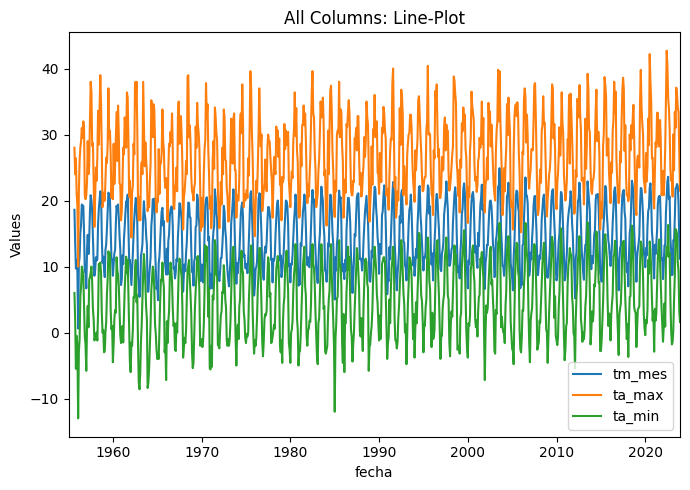

Index type:  datetime64[ns]
1024E : Donostia / San Sebastián, Igeldo --> Data from 1928-01 to 2023-12.


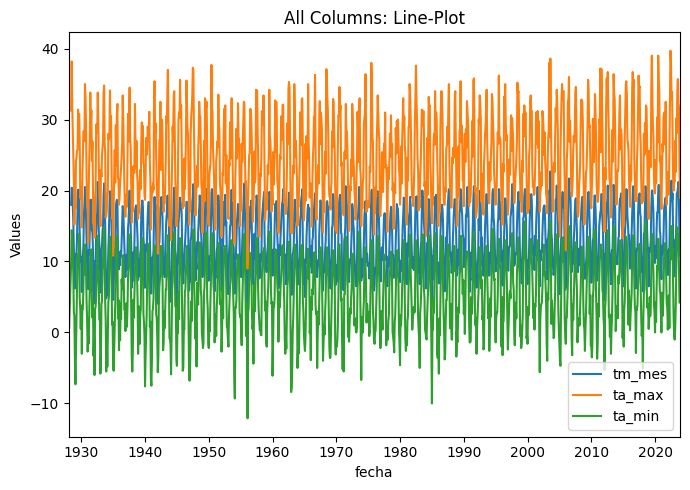

Index type:  datetime64[ns]
1082 : Bilbao Aeropuerto --> Data from 1947-01 to 2023-12.


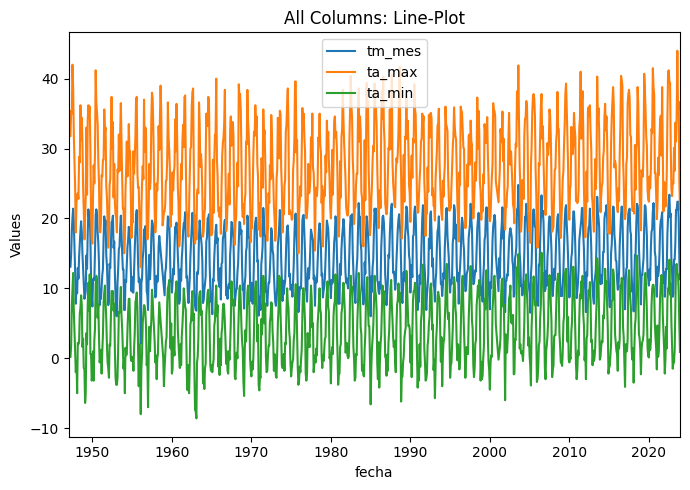

Index type:  datetime64[ns]
9091O : Foronda-Txokiza --> Data from 1973-01 to 2023-12.


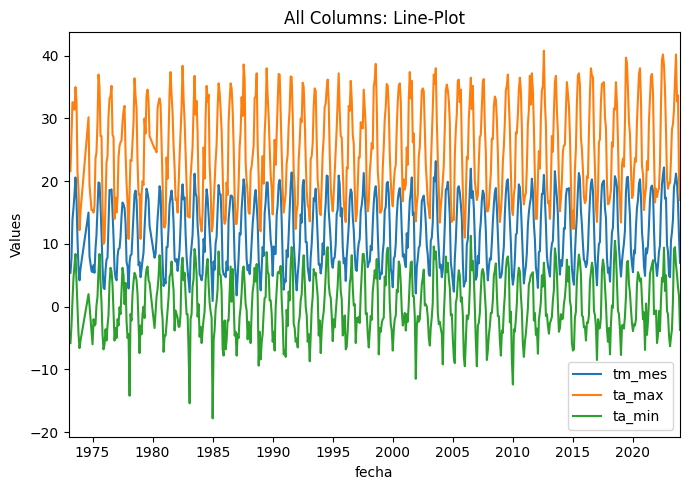

In [16]:
# plot temperature evolution vs timeline
for idema in df_weather_eda['idema'].unique():
    # DataFrame construction to use viz.lineplot_multiple() function
    df_idema = sub_dataframes[idema]
    df_idema = df_idema.set_index('fecha')
    print('Index type: ', df_idema.index.dtype)
    
    AWS_name = df_idema['nombre'].unique()[0]
    min_date = str(df_idema.index.min().strftime('%Y-%m'))
    max_date = str(df_idema.index.max().strftime('%Y-%m'))
    print(f'{idema} : {AWS_name} --> Data from {min_date} to {max_date}.')
    
    # Temperature evolution
    viz.lineplot_multiple(df_idema, ['tm_mes', 'ta_max', 'ta_min'], all_together = True)


Data here is too variable because I am evaluating every month. I should do the mean value per year so we can distinguish a tendency.


1014 : Hondarribia, Malkarroa --> Data from 1955-01 to 2023-12.
Slope:  0.0327195225916453


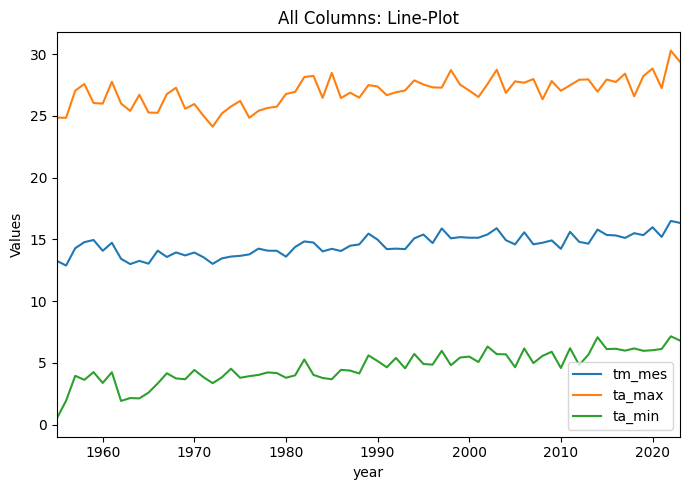

1024E : Donostia / San Sebastián, Igeldo --> Data from 1928-01 to 2023-12.
Slope:  0.01117350560680049


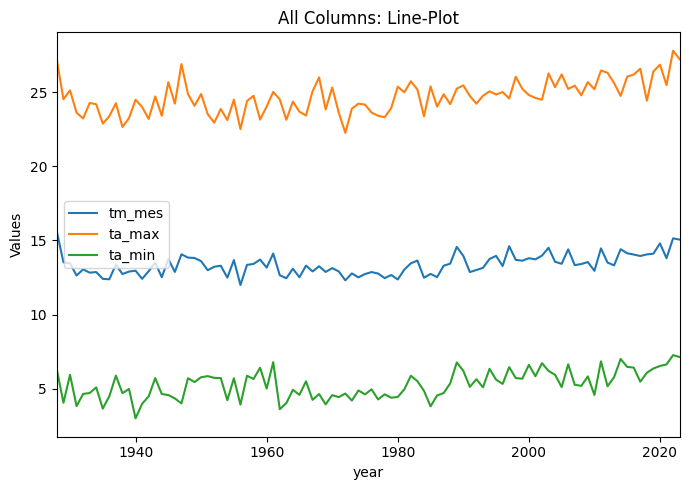

1082 : Bilbao Aeropuerto --> Data from 1947-01 to 2023-12.
Slope:  0.02417847968087246


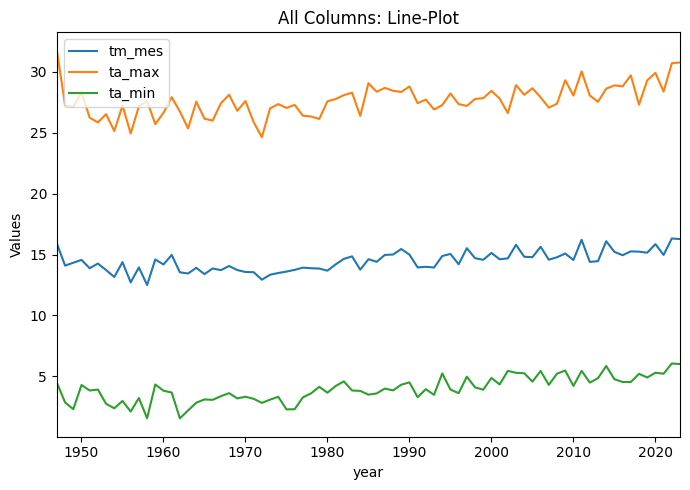

9091O : Foronda-Txokiza --> Data from 1973-01 to 2023-12.
Slope:  0.035980844645549556


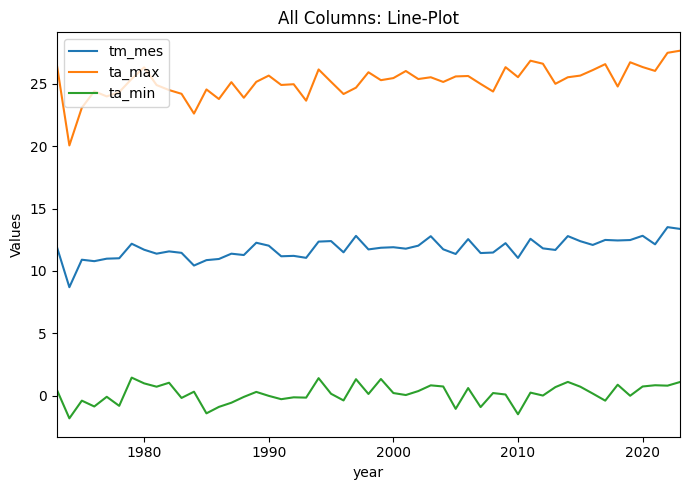

Maximum temperature slope =  0.035980844645549556


In [17]:
# Slope of the temperature variation
slopes_tm_mes = []

# plot mean temperature per year vs timeline
for idema in df_weather_eda['idema'].unique():
    df_idema = sub_dataframes[idema]
    df_idema['year'] = df_idema['fecha'].dt.year
    f.show_AWS_info(df_idema)
    
    # Group by year, calculate the mean of temperature columns, 
    df_yearly = df_idema.groupby('year').agg({'tm_mes': 'mean', 'ta_max': 'mean', 'ta_min': 'mean'}).reset_index()
    # DataFrame construction to use viz.lineplot_multiple() function
    df_yearly.set_index('year', inplace=True)
    
    # Calculate the slope using numpy.polyfit (very simple way)
    tm_mes_slope, tm_mes_intercept = np.polyfit(df_yearly.index, df_yearly['tm_mes'], 1)
    slopes_tm_mes.append(tm_mes_slope)
    print('Slope: ', tm_mes_slope)
    
    viz.lineplot_multiple(df_yearly, ['tm_mes', 'ta_max', 'ta_min'], all_together = True)


print('Maximum temperature slope = ', np.max(slopes_tm_mes)) 

The information of this graphs is quite important.
- Temperature increasing has an slope of up to 0.036 ºC/year, which mean 1.8ºC in the last 50 years.
- That value is very important because 1.5°C of global temperature increase refers to the goal set by the Paris Agreement to limit the global average temperature rise above pre-industrial levels. This is a critical threshold scientists have identified as a limit beyond which the risks of severe and irreversible impacts of climate change significantly increase.

1014 : Hondarribia, Malkarroa --> Data from 1955-01 to 2023-12.
Hot days slope:  0.11823164048227988
Cold days slope:  -0.22236024844720417


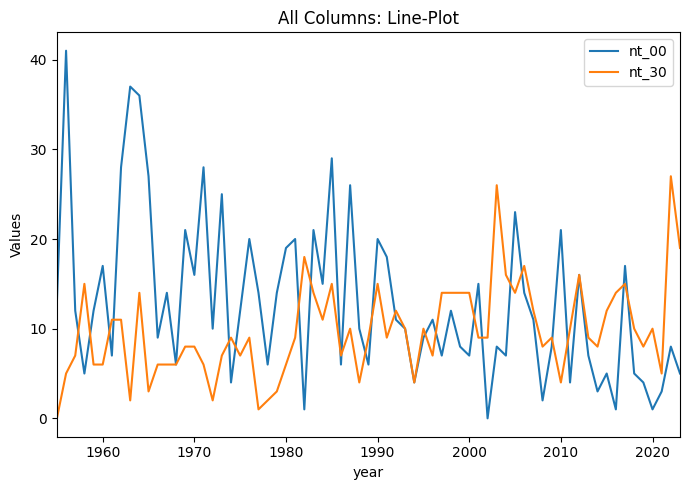

1024E : Donostia / San Sebastián, Igeldo --> Data from 1928-01 to 2023-12.
Hot days slope:  0.03255561584373299
Cold days slope:  -0.08404774823657081


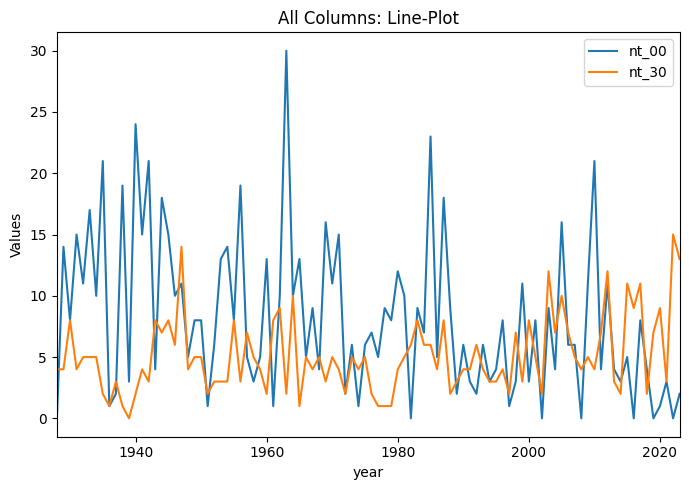

1082 : Bilbao Aeropuerto --> Data from 1947-01 to 2023-12.
Hot days slope:  0.13147378936852858
Cold days slope:  -0.11627845838372389


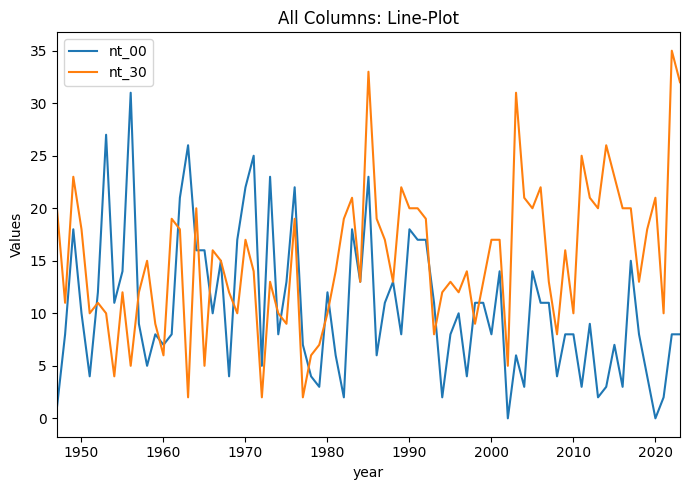

9091O : Foronda-Txokiza --> Data from 1973-01 to 2023-12.
Hot days slope:  0.3851583710407144
Cold days slope:  0.038280542986420765


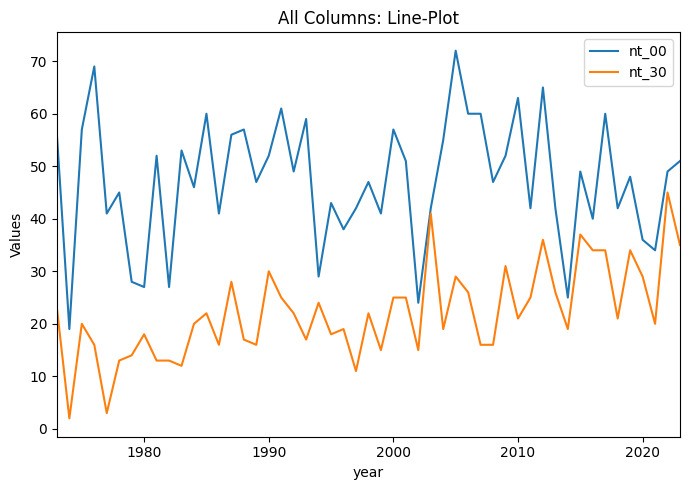

Maximum hot days slope =  0.3851583710407144
Minimum cold days slope =  -0.22236024844720417


In [18]:
# Slope of the hot/cold days variation
slopes_hot_days = []
slopes_cold_days = []

for idema in df_weather_eda['idema'].unique():  
    df_idema = sub_dataframes[idema]
    df_idema['year'] = df_idema['fecha'].dt.year
    f.show_AWS_info(df_idema)    
    
    # Group by year, calculate the sum of hot/cold days 
    df_yearly = df_idema.groupby('year').agg({'nt_30': 'sum', 'nt_00': 'sum'}).reset_index()
    # DataFrame construction to use viz.lineplot_multiple() function
    df_yearly.set_index('year', inplace=True)
   
    # Calculate the slope using numpy.polyfit (very simple way)
    hot_days_slope, hot_days_intercept = np.polyfit(df_yearly.index, df_yearly['nt_30'], 1)
    cold_days_slope, cold_days_intercept = np.polyfit(df_yearly.index, df_yearly['nt_00'], 1)
    slopes_hot_days.append(hot_days_slope)
    slopes_cold_days.append(cold_days_slope)
    print('Hot days slope: ', hot_days_slope)
    print('Cold days slope: ', cold_days_slope)
    
    viz.lineplot_multiple(df_yearly, ['nt_00', 'nt_30'], all_together = True)
    
print('Maximum hot days slope = ', np.max(slopes_hot_days))
print('Minimum cold days slope = ', np.min(slopes_cold_days))
    

Results look quite noisy, but with a simple linar regression we can obtain another really interesting results:

- Hot days (more than 30 ºC is not a normal temperature in basque country) have been increasing up to 0.38 hot days per year. i.e. one extra super calorous day per year; or in other words, one extra super-hot month and one week in the last 100 years.
- On the other side, cold days (less than 0 ºC), a normal temperature in Araba region during fall and winter, are decreasing, up to -0.22 days per year, i.e. 22 days less of cold in the last 100 years.

<h3 id="precipitation-patterns">Precipitation Patterns</h3>

1014 : Hondarribia, Malkarroa --> Data from 1955-01 to 2023-12.
Slope:  nan


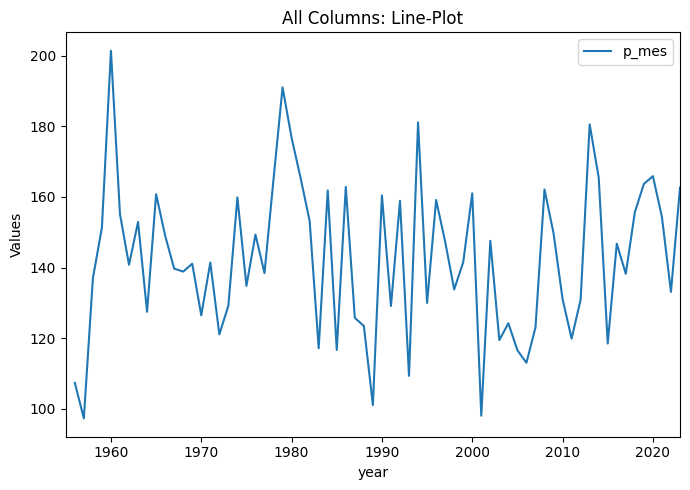

1024E : Donostia / San Sebastián, Igeldo --> Data from 1928-01 to 2023-12.
Slope:  0.007212651474046219


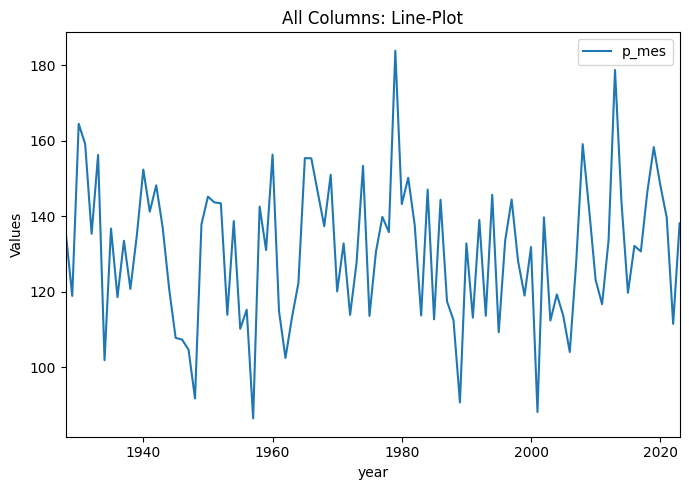

1082 : Bilbao Aeropuerto --> Data from 1947-01 to 2023-12.
Slope:  -0.15263352277706693


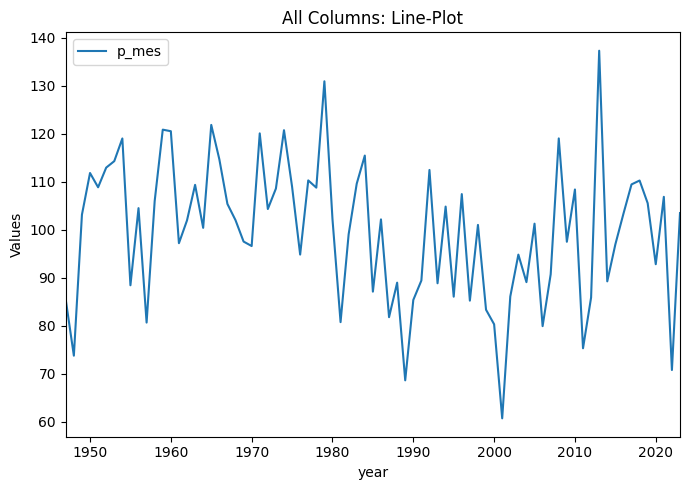

9091O : Foronda-Txokiza --> Data from 1973-01 to 2023-12.
Slope:  -0.1689393665158215


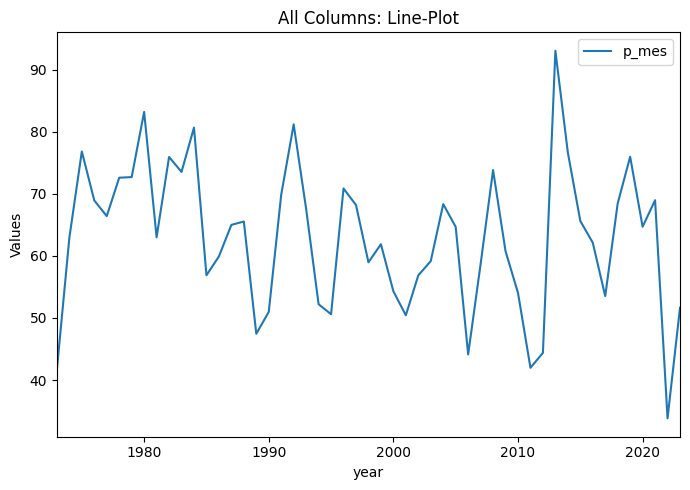

In [19]:
# Precipitation variation
for idema in df_weather_eda['idema'].unique():  
    df_idema = sub_dataframes[idema]
    df_idema['year'] = df_idema['fecha'].dt.year
    f.show_AWS_info(df_idema)

    # Group by year and calculate the mean of temperature columns
    df_yearly = df_idema.groupby('year').agg({'p_mes': 'mean'}).reset_index()
    # DataFrame construction to use viz.lineplot_multiple() function
    df_yearly.set_index('year', inplace=True)
    
    # Calculate the slope using numpy.polyfit (very simple way)
    p_mes_slope, tm_mes_intercept = np.polyfit(df_yearly.index, df_yearly['p_mes'], 1)
    print('Slope: ', p_mes_slope)
    
    viz.lineplot_multiple(df_yearly, ['p_mes'], all_together = True)
    

There is no clear conclusion (yet) on the evolution of precipitation because the results fluctuates too much between territories.

Let's evaluate the number of rainy days.

But for this analysis I am going to use data from the last 25 years


In [20]:
# Group by 'idema' and filter out those groups that do not have data for at least 25 years of data
df_weather_eda = df_weather.groupby('idema').filter(lambda x: (x['fecha'].max() - x['fecha'].min()).days/365 >= 25).copy()

# Delete data with 'fecha' >= 2024
df_weather_eda = df_weather_eda[df_weather_eda['fecha'] < '2024-01-01']

# Delete Vitoria Airfield
df_weather_eda = df_weather_eda[df_weather_eda['idema'] != '9087']

# df_weather_eda is the DataFrame to termporal analyses
f.show_AWS_info(df_weather_eda)

# Create a dictionary to store "df_weather_eda" DataFrames by "idema"
sub_dataframes = {}

for idema in df_weather_eda['idema'].unique():
    # Filter the original DataFrame by "idema"
    df_idema = df_weather_eda[df_weather_eda['idema'] == idema].copy()
    # Storage the DataFrame in the dictionary with an unique key
    sub_dataframes[f'{idema}'] = df_idema


1014 : Hondarribia, Malkarroa --> Data from 1955-01 to 2023-12.
1024E : Donostia / San Sebastián, Igeldo --> Data from 1928-01 to 2023-12.
1041A : Zumaia --> Data from 1997-01 to 2023-12.
1050J : Elgoibar --> Data from 1997-01 to 2023-12.
1057B : Matxitxako --> Data from 1997-01 to 2023-12.
1078I : Güeñes --> Data from 1997-01 to 2023-12.
1082 : Bilbao Aeropuerto --> Data from 1947-01 to 2023-12.
9091O : Foronda-Txokiza --> Data from 1973-01 to 2023-12.


1014 : Hondarribia, Malkarroa --> Data from 1957-01 to 2023-12.
Days with appreciable precipitation  slope:  0.13847872934791602
Rainy days slope:  0.09633649932157813


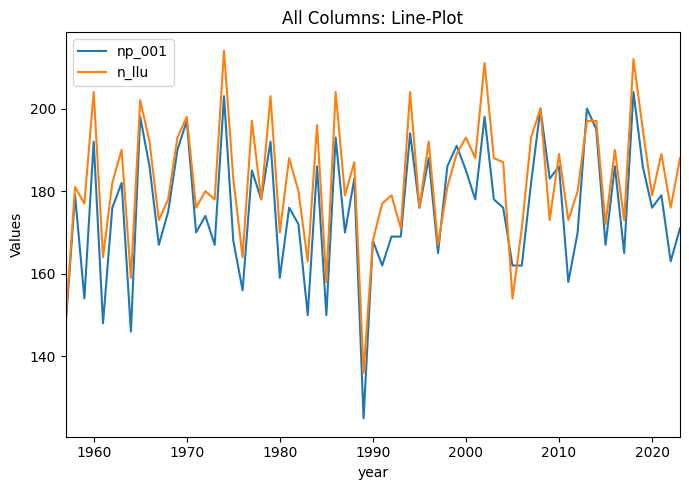

1024E : Donostia / San Sebastián, Igeldo --> Data from 1928-01 to 2023-12.
Days with appreciable precipitation  slope:  -0.054551003798154994
Rainy days slope:  -0.022341291372761394


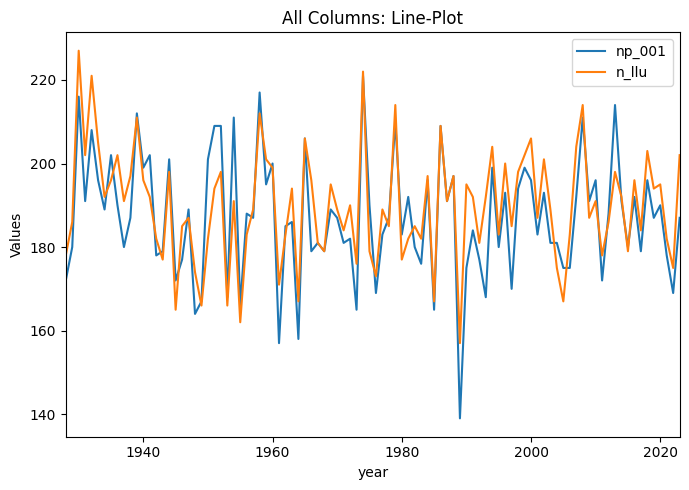

1041A : Zumaia --> Data from 1997-01 to 2023-12.
Days with appreciable precipitation  slope:  1.2832722832723424
Rainy days slope:  0.0


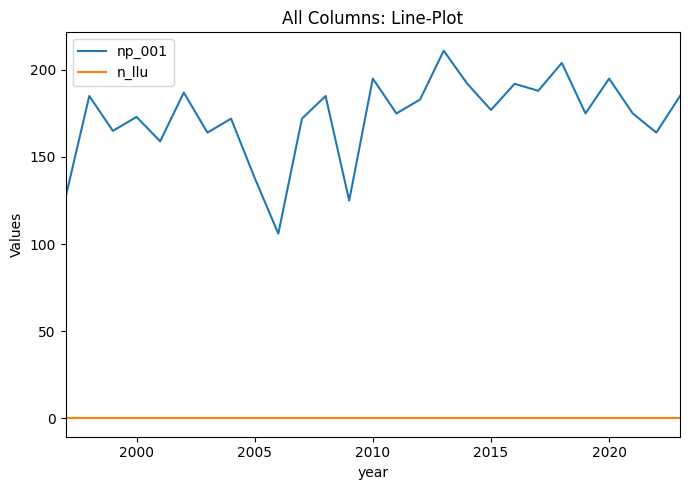

1050J : Elgoibar --> Data from 1997-01 to 2023-12.
Days with appreciable precipitation  slope:  1.0726495726495426
Rainy days slope:  0.0


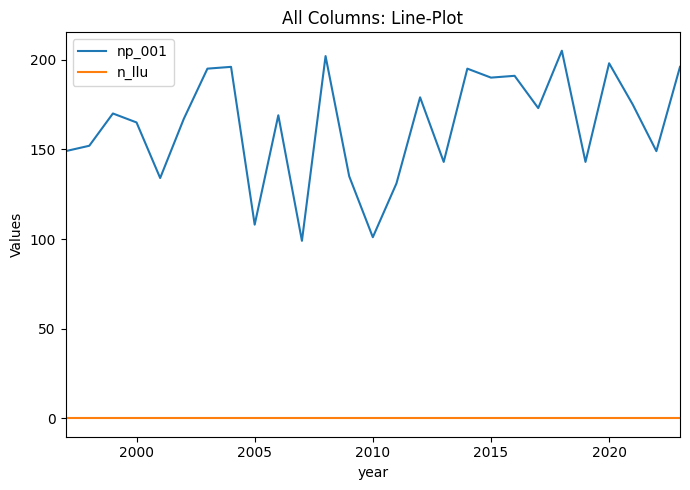

1057B : Matxitxako --> Data from 1997-01 to 2023-12.
Days with appreciable precipitation  slope:  0.031746031746156235
Rainy days slope:  0.0


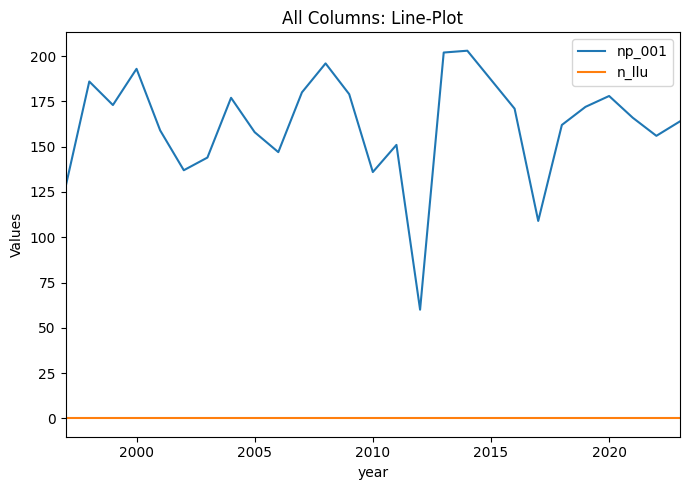

1078I : Güeñes --> Data from 1997-01 to 2023-12.
Days with appreciable precipitation  slope:  -0.6050061050060292
Rainy days slope:  0.0


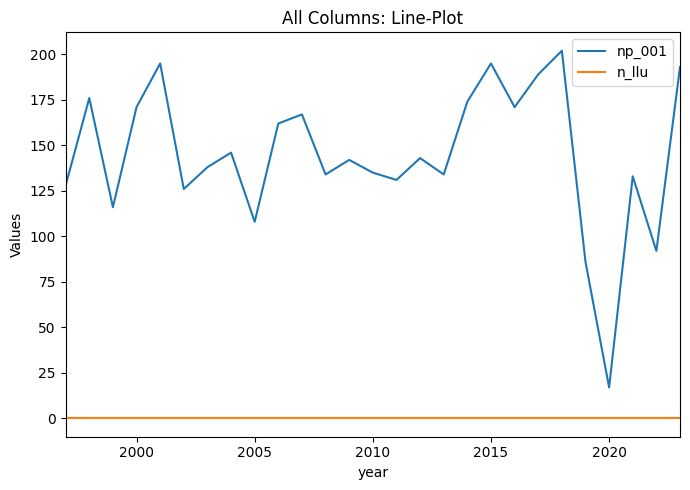

1082 : Bilbao Aeropuerto --> Data from 1947-01 to 2023-12.
Days with appreciable precipitation  slope:  0.36589726063410016
Rainy days slope:  0.31999579368000125


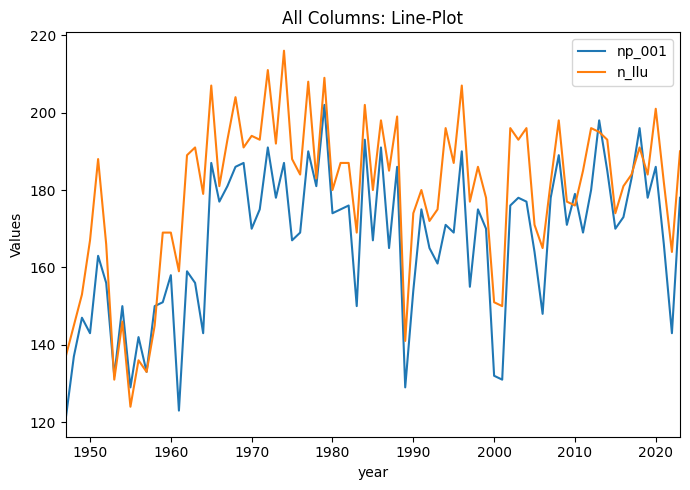

9091O : Foronda-Txokiza --> Data from 1973-01 to 2023-12.
Days with appreciable precipitation  slope:  0.140271493212682
Rainy days slope:  0.06334841628959755


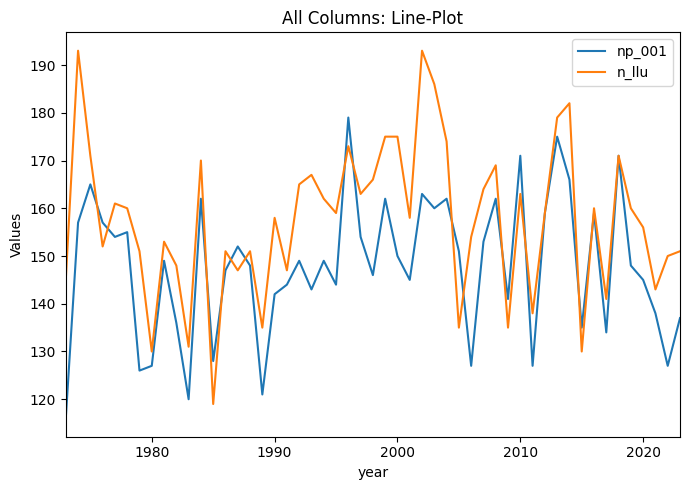

Maximum Days with appreciable precipitation slope =  1.2832722832723424
Minimum Days with appreciable precipitation slope =  -0.022341291372761394


In [21]:
# Slope of the rainy days (It's "np_001" and "n_llu" the same data?)
slopes_np_001 = []
slopes_n_llu = []

for idema in df_weather_eda['idema'].unique():  
    df_idema = sub_dataframes[idema]
    # Modify Hondarribia because it has missing values during the first two years
    if idema == '1014':
        df_idema = df_idema[df_idema['fecha'] >= '1957-01'].copy()
    df_idema['year'] = df_idema['fecha'].dt.year
    f.show_AWS_info(df_idema)    
    
    # Group by year, calculate the sum of rainy days 
    df_yearly = df_idema.groupby('year').agg({'np_001': 'sum', 'n_llu': 'sum'}).reset_index()
    # DataFrame construction to use viz.lineplot_multiple() function
    df_yearly.set_index('year', inplace=True)
   
    # Calculate the slope using numpy.polyfit (very simple way)
    np_001_slope, np_001_intercept = np.polyfit(df_yearly.index, df_yearly['np_001'], 1)
    n_llu_slope, n_llu_intercept = np.polyfit(df_yearly.index, df_yearly['n_llu'], 1)
    slopes_np_001.append(np_001_slope)
    slopes_n_llu.append(n_llu_slope)
    print('Days with appreciable precipitation  slope: ', np_001_slope)
    print('Rainy days slope: ', n_llu_slope)
    
    viz.lineplot_multiple(df_yearly, ['np_001', 'n_llu'], all_together = True)

print('Maximum Days with appreciable precipitation slope = ', np.max(slopes_np_001))
print('Minimum Days with appreciable precipitation slope = ', np.min(slopes_n_llu))

The rainfall conclusions are confusing and will be discussed in the next section.

Donostia, the city where it rains the most in Spain, is also losing the most. 

It depends a lot on the territory and there is no general trend for the whole Basque Country for the momento.


<h2 id="geographical-comparison">Geographical comparison</h2>

In [28]:
# Delete data with 'fecha' >= 2024 and Vitoria Airfield
df_weather_eda = df_weather[df_weather['fecha'] < '2024-01-01'].copy()
df_weather_eda = df_weather_eda[df_weather_eda['idema'] != '9087']
df_weather_eda['year'] = df_weather_eda['fecha'].dt.year 

# display(df_weather_eda)

df_weather_eda = df_weather_eda.groupby(['idema', 'nombre', 'provincia', 'altitud', 'longitud', 'latitud', 'year']).agg({
    'tm_mes' : 'mean', 'ta_max' : 'mean', 'ta_min' : 'mean', 'p_mes' : 'mean',
    'glo' : 'mean', 'ts_10' : 'mean', 'ts_20' : 'mean', 'ts_50' : 'mean',
    'nt_30' : 'sum', 'nt_00' : 'sum', 'np_001': 'sum', 'nw_91' : 'sum',
    'n_llu': 'sum', 'n_nie' : 'sum', 'n_gra' : 'sum'}).reset_index()
df_weather_eda.replace(0, np.nan, inplace = True)

# with pd.option_context('display.max_rows', None):
#     display(df_weather_eda)

display(df_weather_eda.sample(10))

,idema,nombre,provincia,altitud,longitud,latitud,year,tm_mes,ta_max,ta_min,p_mes,glo,ts_10,ts_20,ts_50,nt_30,nt_00,np_001,nw_91,n_llu,n_nie,n_gra
632,1082,Bilbao Aeropuerto,Bizkaia,42,-2.906389,43.298056,1956,12.716667,24.925000,2.125000,104.516667,NaN,NaN,NaN,NaN,5.0,31.0,142.0,1.0,136.0,7.0,NaN
487,1057B,Matxitxako,Bizkaia,93,-2.752778,43.453889,2018,15.409091,24.981818,8.209091,112.709091,NaN,NaN,NaN,NaN,NaN,2.0,162.0,28.0,NaN,NaN,NaN
407,1050J,Elgoibar,Gipuzkoa,119,-2.413333,43.209444,2019,12.166667,25.388889,2.544444,142.000000,NaN,NaN,NaN,NaN,3.0,5.0,143.0,1.0,NaN,NaN,NaN
429,1055B,Lekeitio,Bizkaia,12,-2.510278,43.376944,1999,14.108333,23.925000,6.666667,53.891667,NaN,NaN,NaN,NaN,NaN,2.0,155.0,11.0,NaN,NaN,NaN
468,1057B,Matxitxako,Bizkaia,93,-2.752778,43.453889,1999,NaN,NaN,NaN,96.216667,NaN,NaN,NaN,NaN,NaN,NaN,173.0,21.0,NaN,NaN,NaN
872,9178X,Campezo/Kanpezu,Araba,570,-2.346111,42.670556,2017,13.518182,27.945455,0.990909,48.536364,NaN,NaN,NaN,NaN,42.0,40.0,110.0,NaN,NaN,NaN,NaN
318,1041A,Zumaia,Gipuzkoa,28,-2.251111,43.302222,2006,16.400000,27.690000,7.260000,58.812500,NaN,NaN,NaN,NaN,7.0,6.0,106.0,4.0,NaN,NaN,NaN
677,1082,Bilbao Aeropuerto,Bizkaia,42,-2.906389,43.298056,2001,14.609091,27.781818,4.345455,60.754545,42805.375,NaN,NaN,NaN,17.0,14.0,131.0,1.0,150.0,1.0,6.0
843,9145X,Leza,Araba,575,-2.632778,42.567222,2009,14.675000,28.325000,2.600000,37.475000,NaN,NaN,NaN,NaN,35.0,16.0,60.0,NaN,NaN,NaN,NaN
569,1074C,Amorebieta-Etxano,Bizkaia,100,-2.706111,43.202778,2012,13.883333,28.375000,3.250000,94.600000,NaN,NaN,NaN,NaN,32.0,18.0,193.0,NaN,NaN,NaN,NaN


In [23]:
# # Delete data with 'fecha' >= 2024 and Vitoria Airfield
# df_weather_eda = df_weather[df_weather['fecha'] < '2024-01-01'].copy()
# df_weather_eda = df_weather_eda[df_weather_eda['idema'] != '9087']

# # Create a dictionary to store "df_weather_eda" DataFrames by "idema"
# sub_dataframes = {}
# for idema in df_weather_eda['idema'].unique():
#     # Filter the original DataFrame by "idema"
#     df_idema = df_weather_eda[df_weather_eda['idema'] == idema].copy()
#     df_idema['year'] = df_idema['fecha'].dt.year 
    
#     # Group by year, calculate the mean of pysical parameters and the sum number of days 
#     df_idema = df_idema.groupby('year').agg({'tm_mes' : 'mean', 'ta_max' : 'mean', 'ta_min' : 'mean', 'p_mes' : 'mean',
#                                             'glo' : 'mean', 'ts_10' : 'mean', 'ts_20' : 'mean', 'ts_50' : 'mean',
#                                             'nt_30' : 'sum', 'nt_00' : 'sum', 'np_001': 'sum', 'nw_91' : 'sum',
#                                             'n_llu': 'sum', 'n_nie' : 'sum', 'n_gra' : 'sum'})
    
#     # Storage the DataFrame in the dictionary with an unique key
#     sub_dataframes[f'{idema}'] = df_idema

# # Example of Irún
# print('Irún DataFrame:')
# display(sub_dataframes['1012P'])

`NOTE:` It is not neccesary to clean the dataset of NaN values when calculating the "mean" because pandas do it by itself, not counting missing values to calculate it

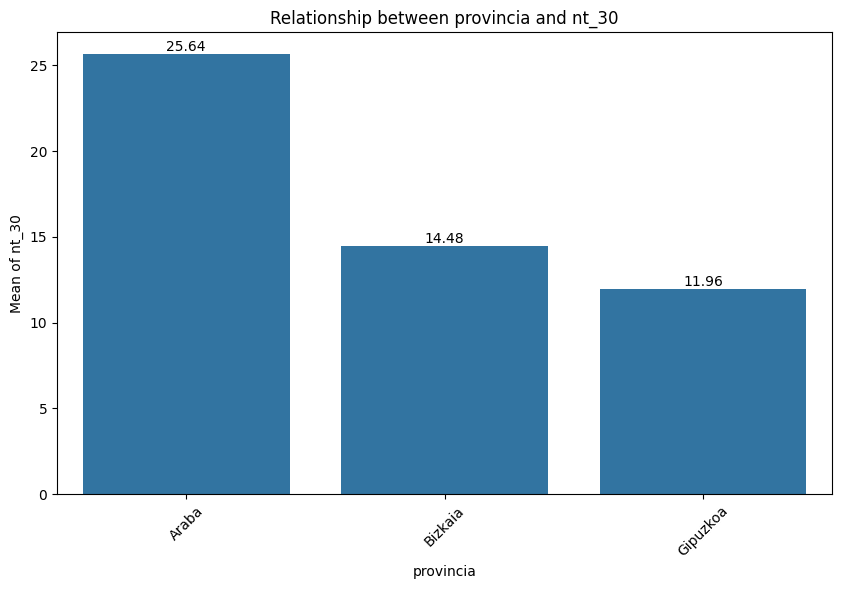

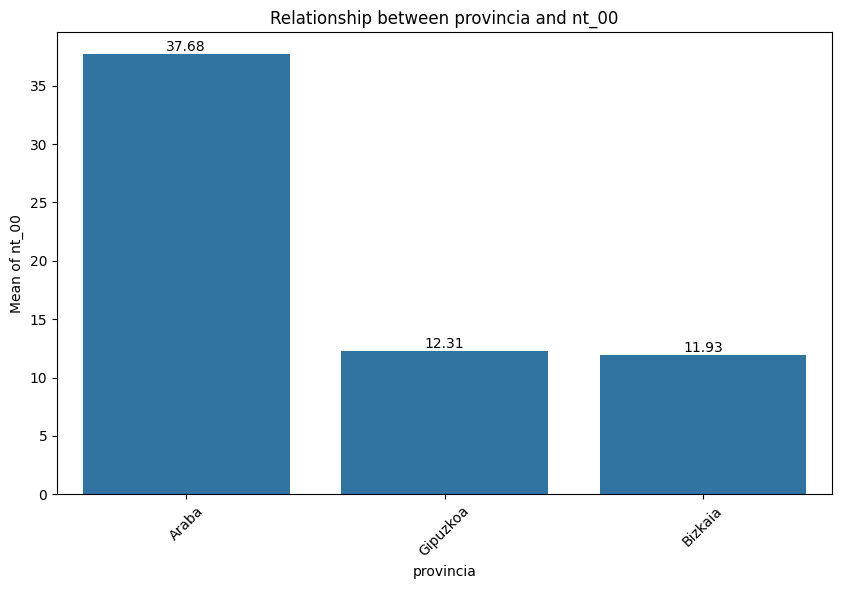

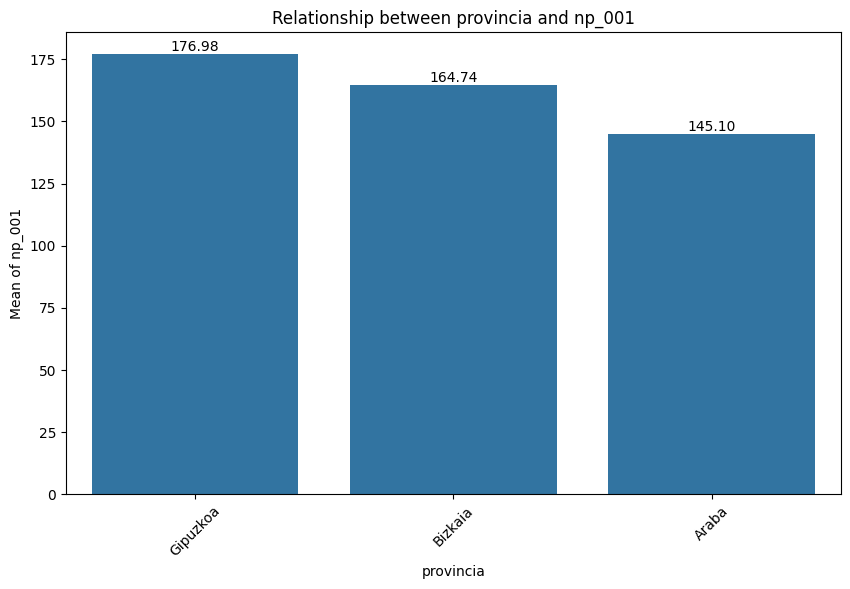

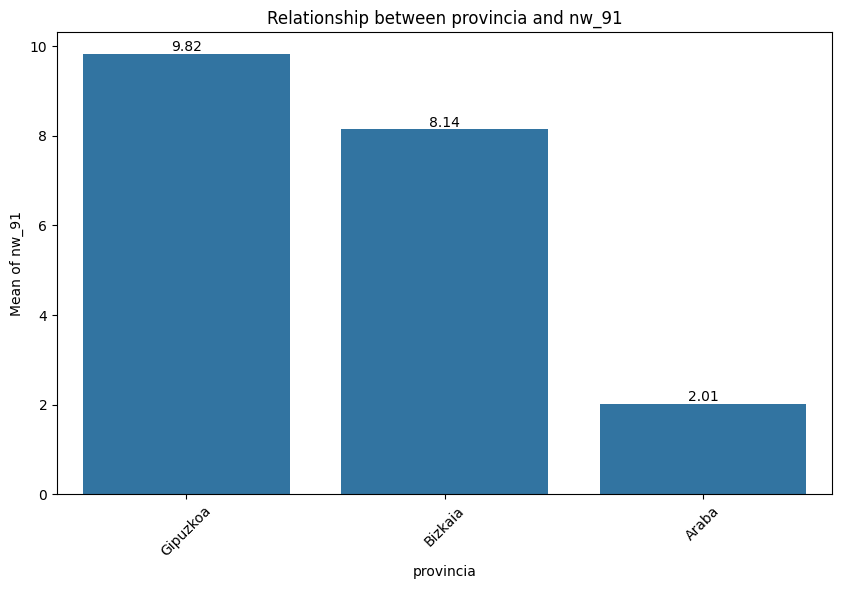

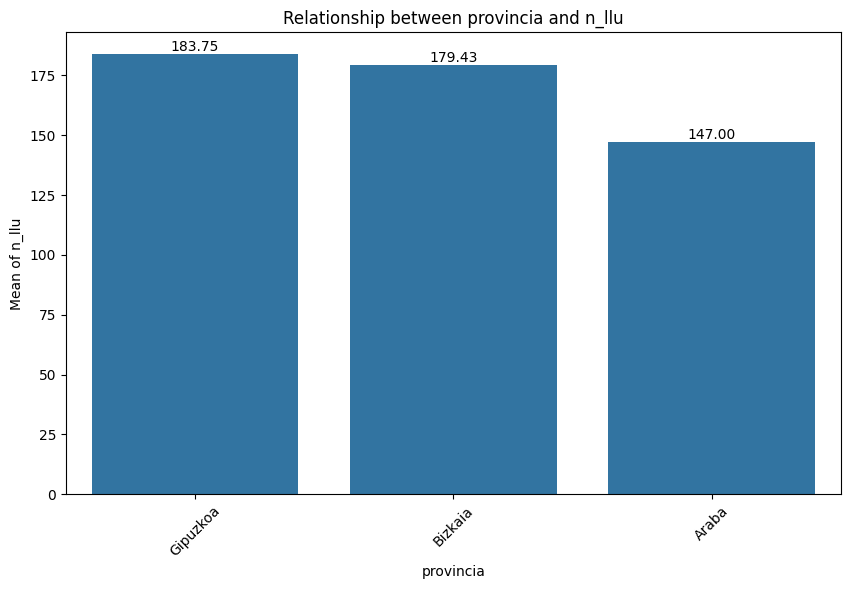

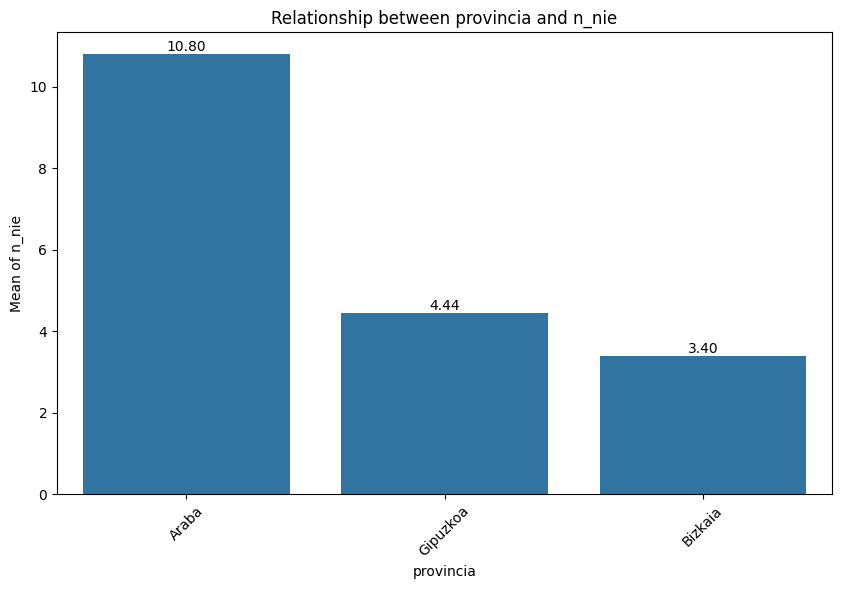

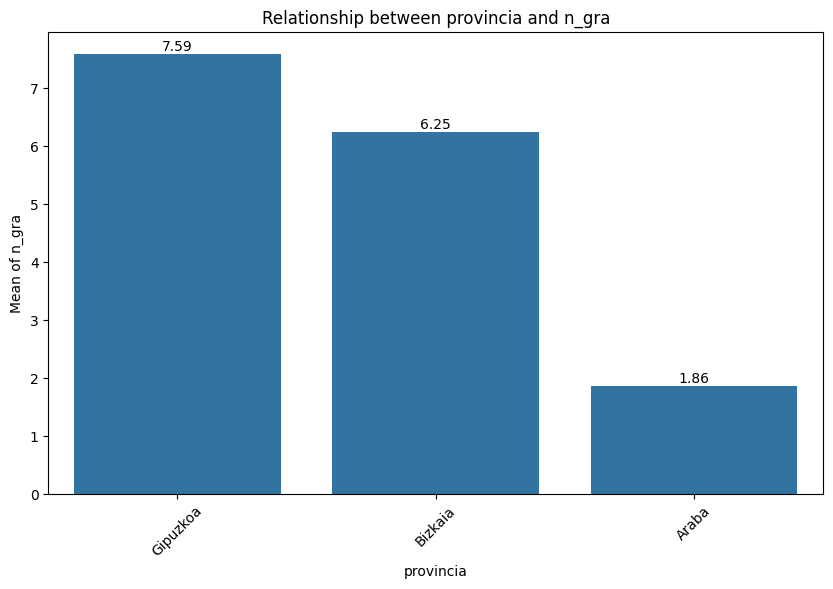

In [29]:
weather_events = ['nt_30', 'nt_00', 'np_001', 'nw_91', 'n_llu', 'n_nie', 'n_gra']
weather_measurements = ['tm_mes', 'ta_max', 'ta_min', 'p_mes', 'glo', 'ts_10', 'ts_20', 'ts_50']

for event in weather_events:
    viz.plot_categorical_numerical_relationship(df_weather_eda, 'provincia', event, measure = 'mean')


Here the stereotypes are fulfilled and anyone who knows the Basque Country is already aware of the facts that:
- Araba has the most extreme temperatures. it's the province with more numerber of hot days per year, but also the one with more extreme cold days. And it's the city where it snows the most
- On the other hand, Gipuzkoa, with it's montain and peaks, it's the more windy territory, and also the most rainy one. (Donostia is the city where it rains the most per year)

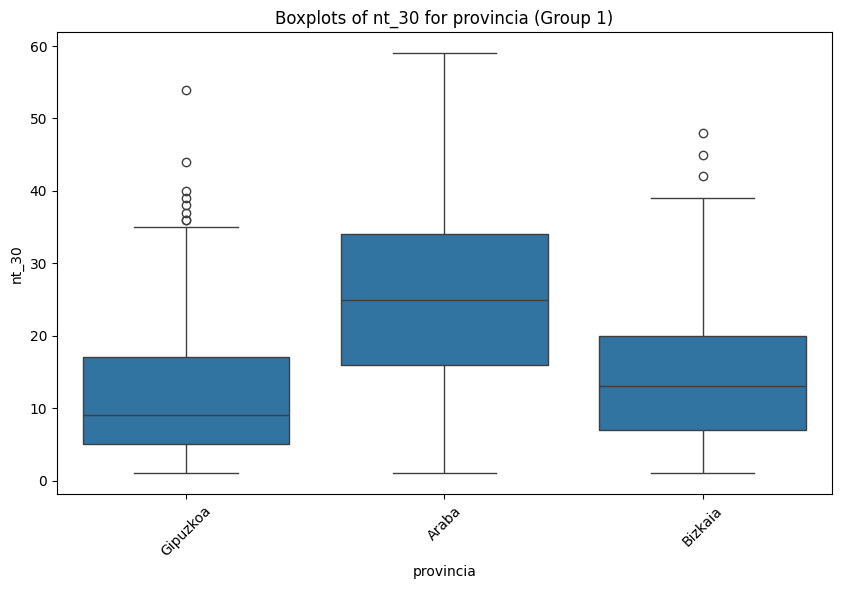

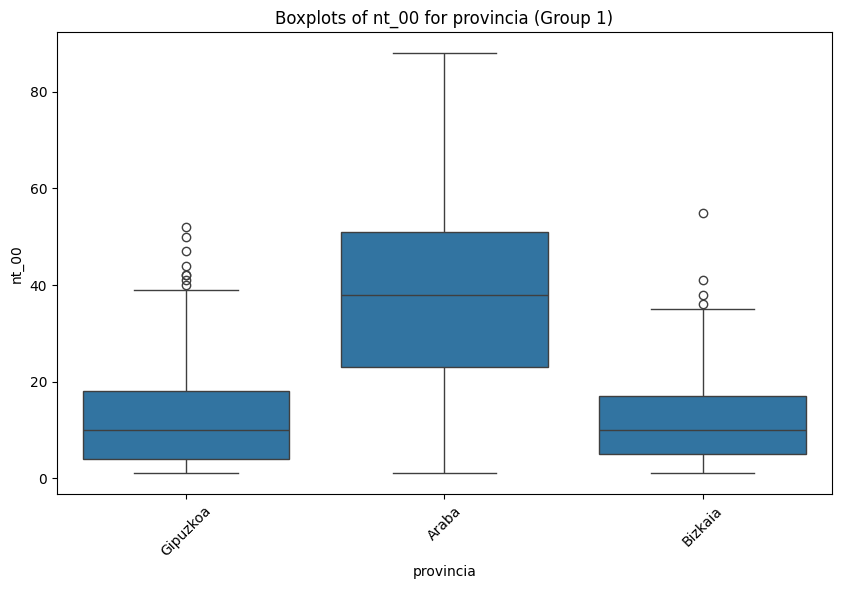

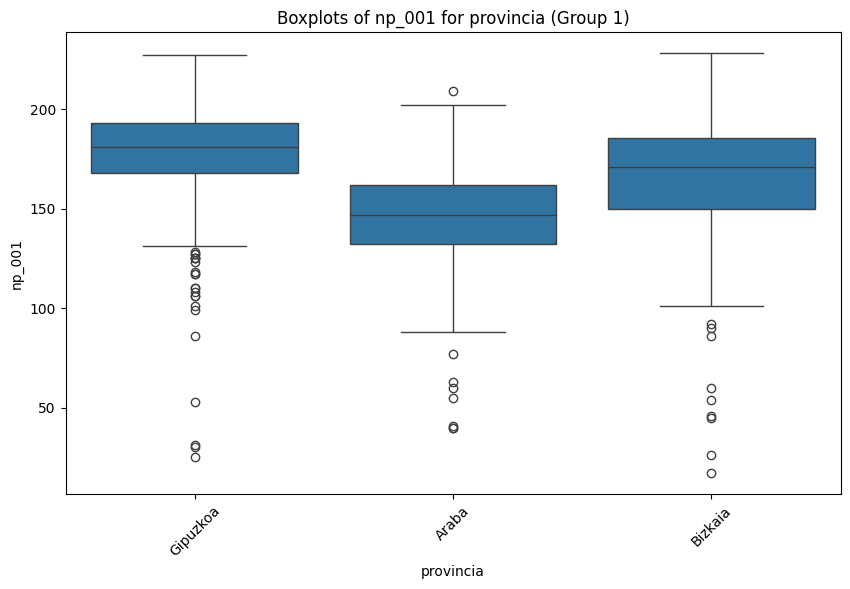

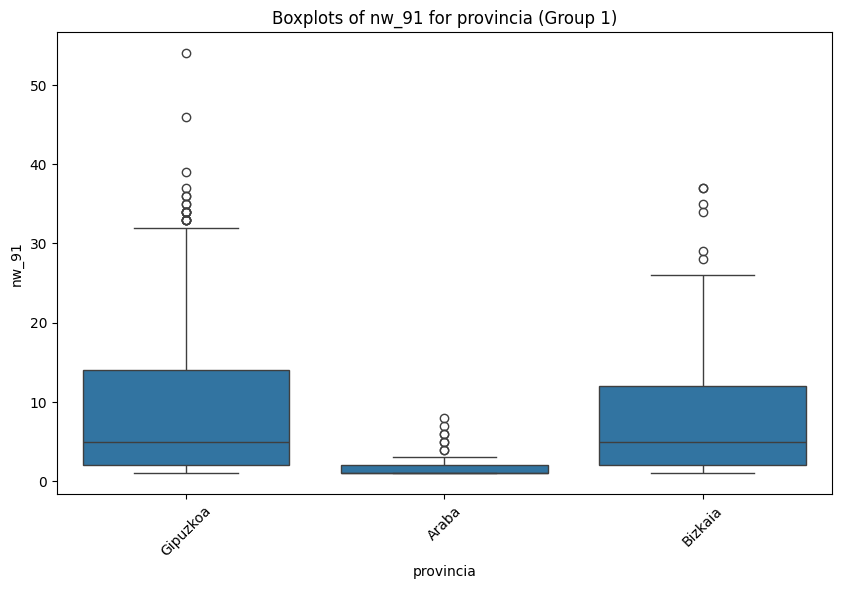

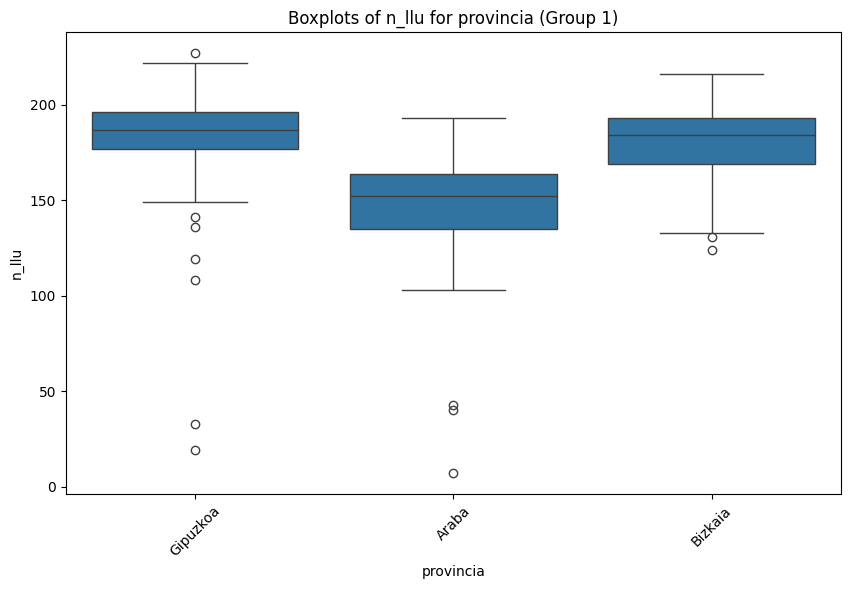

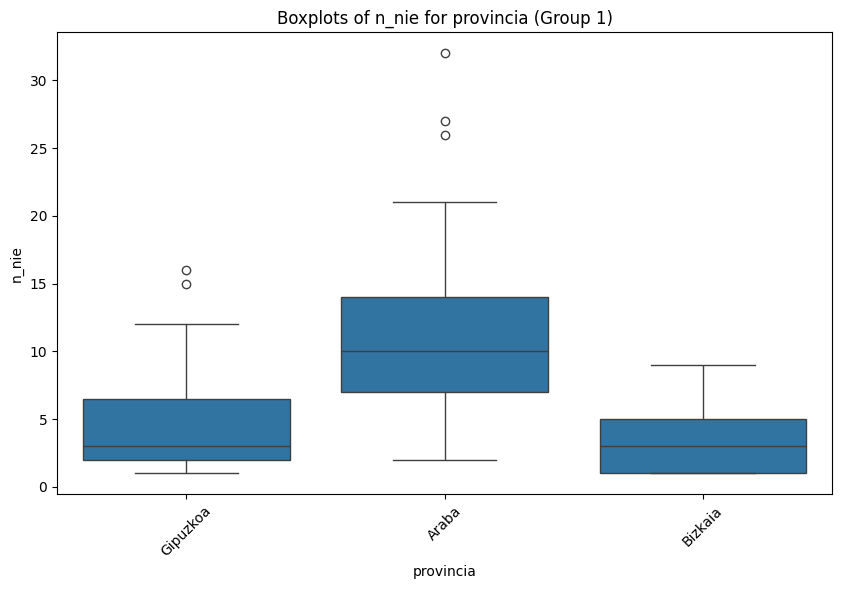

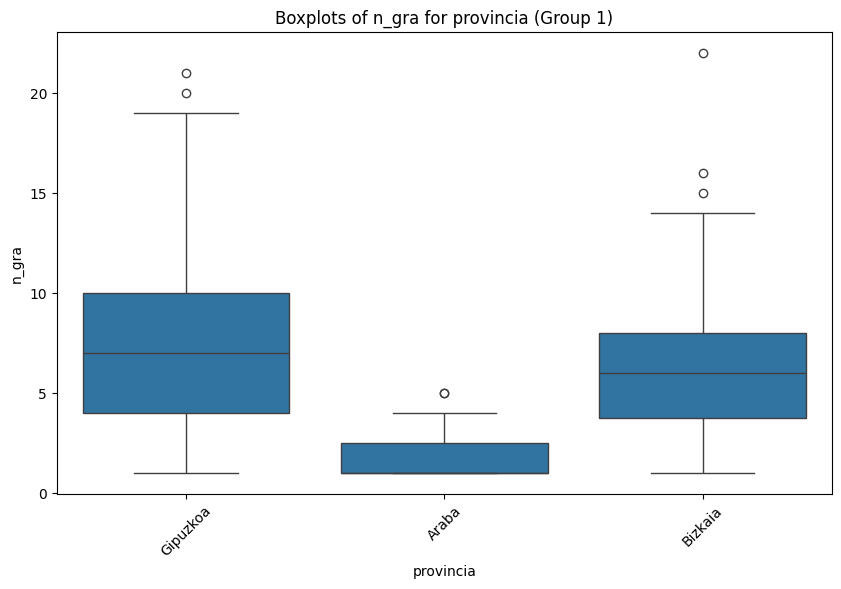

In [32]:
for event in weather_events:
    viz.boxplots_grouped(df_weather_eda, 'provincia', event)

#### Los histogramas NO valen de nada si no acoto todo a las mismas fechas

### Puedo mirar en tres decadas distintas: del 

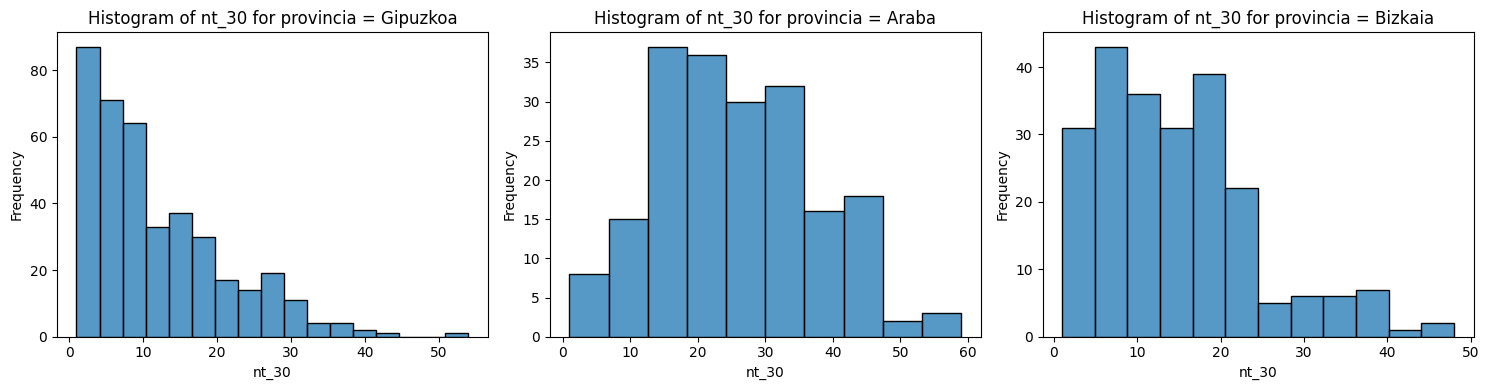

In [34]:
viz.plot_histograms_by_categorical_numerical_relationship(df_weather_eda, 'provincia', 'nt_30')

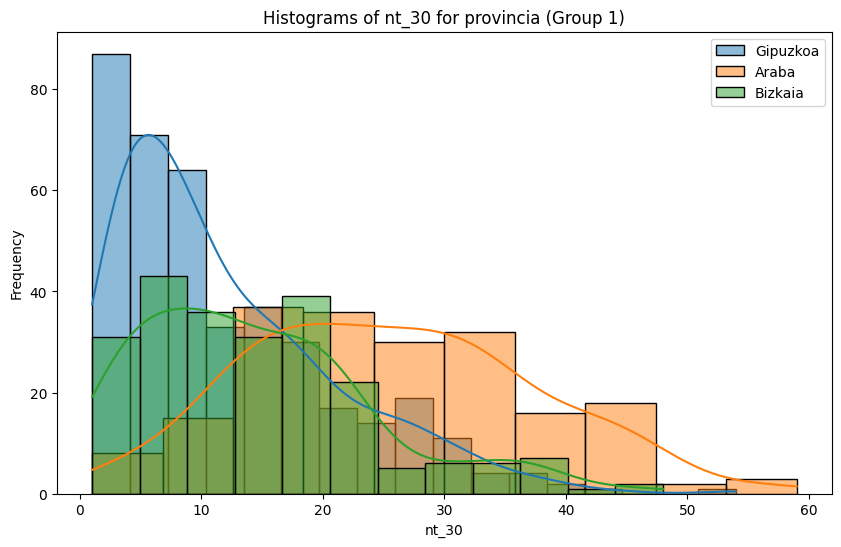

In [35]:
viz.plot_histograms_grouped(df_weather_eda, 'provincia', 'nt_30')